# Relacionamento entre variáveis(Cap7) - Pense Estatística, 2º Edição.

## Universidade Federal de Alagoas - UFAL
## Centro de Tecnologia - CTEC
## Programa de Pós-Graduação Recursos Hídricos e Saneamento - PPGRHS
### Disciplina de Estatística

Clebson Farias

In [2]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd

import thinkstats2
import thinkplot

* Duas variáveis estão relacionadas quando uma variável fornece informações sobre a outra;
* A relação não precisa ser perfeitas, mas ao conhecer uma variável, poderemos estimar melhor a outra; 

In [4]:
dados = pd.read_csv("manso.csv", index_col=0, parse_dates=True)
dados.head()

,1455008,66231000,MANSO
Date,,,
1981-07-12,0.0,90.928,NaN
1981-07-13,0.0,94.663,NaN
1981-07-14,0.0,93.413,NaN
1981-07-15,0.0,92.168,NaN
1981-07-16,0.0,92.168,NaN


* 1455008 - FAZENDA RAIZAMA (Plu)
* 66231000 - FAZENDA RAIZAMA (Flu)

## 7.1 Gráfico de dispersão
* Opção mais simples para verificar relação entre duas variáveis;
* Consiste no lançamento dos pares de observações das variáveis que se deseja verificar a relação;
* Para o exemplo foram consideradas as variáveis de vazão naturais e observadas para o posto de Xingo;
* Fornece uma impressão geral sobre o relacionamento entre variáveis;

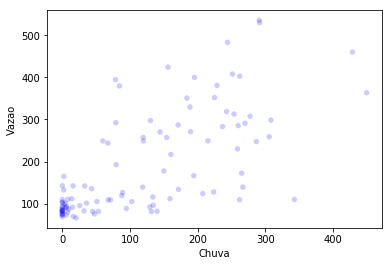

<Figure size 576x432 with 0 Axes>

In [5]:
dados_chuva = dados["1455008"].groupby(pd.Grouper(freq='M')).sum()
dados_vazao = dados["66231000"].groupby(pd.Grouper(freq='M')).mean()
dados_month = pd.DataFrame([dados_chuva, dados_vazao])

thinkplot.Scatter(dados_chuva, dados_vazao)
thinkplot.Show(xlabel='Chuva', ylabel='Vazao', legend=False)
dados_month = dados_month.T

* Podemos observar que existe alguma relação entre as variáveis, mas podemos notar algumas aleatoriedade entre as variáveis de chuva e vazão.
* A variável de vazão não depende somente da variável de chuva;

#### HexBin

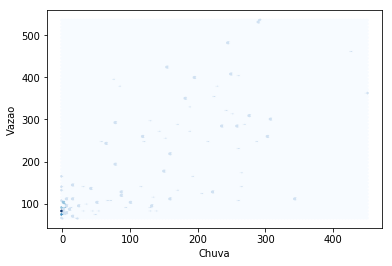

<Figure size 576x432 with 0 Axes>

In [6]:
thinkplot.HexBin(dados_chuva, dados_vazao)
thinkplot.Show(xlabel='Chuva', ylabel='Vazao', legend=False)

* Uma vantagem do HexBin é que ele mostra bem a forma do relacionamento;
* É eficiente para grande quantidades de dados;

## 7.2 Caracterizando relacionamentos

* Outras formas de visualização fornece um maior conhecimento da natureza do relacionamento; 
 * Uma opção é uma variável bin e outra é o gráfico de percentis;

In [7]:
dados_month = dados_month.dropna(subset=["1455008", "66231000"])
bins = np.arange(0, 400, 40)
indices = np.digitize(dados_month["1455008"], bins)
groups = dados_month.groupby(indices)

In [8]:
mean_chuva = [group["1455008"].mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group["66231000"]) for i, group in groups]

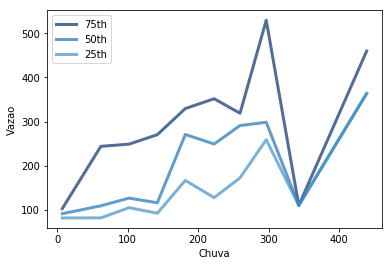

In [9]:
for percent in [75, 50, 25]:
    vazao_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(mean_chuva, vazao_percentiles, label=label)
    
thinkplot.Config(xlabel='Chuva',
                 ylabel='Vazao',
                 legend=True)

## 7.3  Correlação
* Utilizada para **quantificar a força** de relacionamento entre duas variáveis;
* Um dos problemas para medir a relação entre duas variáveis é que muitas vezes elas não apresentam as mesmas **unidades** ou são de **distribuições diferentes**;
* As soluções para esses problemas são:
 * Transformar cada valor em um **score padrão**: que é o número desvio padrão a partir da média, "Coeficiente de correlação produto-momento de Pearson";
 * Transformar cada valor em **rank**: que é uma lista organizado pelo index de cada valor, “Coeficiente de correlação Spearman rank".
* Se X é uma série de n valores, então o score padrão(Z) é:
\begin{align}
z_i & = \frac{x_i-\mu}{\sigma} \\
\end{align}
Onde:
 * $z_i$ é score padrão;
 * $x_i$ valor da variável;
 * $\mu$ é a média;
 * $\sigma$ é o desvio padrão.
* O Score padrão (Z) é admensional;

In [10]:
df_zscore = (dados_vazao - dados_vazao.mean())/dados_vazao.std()
df_zscore.head(5)

Date
1981-07-31   -0.784280
1981-08-31   -0.854434
1981-09-30   -0.878344
1981-10-31   -0.638912
1981-11-30   -0.163587
Freq: M, Name: 66231000, dtype: float64

## 7.4  Covariância

* É uma medida da tendência de duas variáveis variarem juntas. 
* Se temos duas séries, X e Y, seus desvios a partir da média são:
\begin{align}
dx_i & = x_i - \overline{x}\\
dy_i & = y_i - \overline{y}\\
\end{align}
Onde,
 * $\overline{x}$ é a média da amostra X;
 * $\overline{y}$ é a média da amostra Y;
* X e Y variando juntos, os sinais dos desvios tendem a ter o mesmo sinal;
* O produto é positivo quando os desvios tiverem o mesmo sinal e negativos quando tiverem o sinal oposto.
* Covariância é a média dos produtos dos desvios;
\begin{align}
Cov(X,Y) = \frac{1}{n} \sum dx_i dy_i
\end{align}
Onde:
 * $n$ é o tamanho das séries;

In [11]:
print("Covariância: ", dados_chuva.cov(dados_vazao))

Covariância:  9385.893249911083


## 7.5 Correlação de Pearson

* Corvariância é muito utilizada, mas é difícil de interpretar;
* Um dos problemas é a difecença de unidades;
* Para resolver esse problema, divide os desvios pelos desvio padrão;
\begin{align}
P_i = \frac{(x_i - \overline{x})}{S_X}  \frac{(y_i - \overline{y})}{S_Y}
\end{align}

Onde $S_X$ e $S_Y$ são os desvios padrão de $X$ e $Y$. A média destes produtos é
\begin{align}
\rho = \frac{1}{n} \sum \rho_i
\end{align}
Reescrever $\rho$ calculando $S_X$ e $S_Y$
Onde $S_X$ e $S_Y$ são os desvios padrão de $X$ e $Y$. A média destes produtos é
\begin{align}
\rho = \frac{Cov(X, Y)}{S_X S_Y}
\end{align}

In [12]:
print("Correlação Pearson: ", dados_chuva.corr(dados_vazao))

Correlação Pearson:  0.6918971778258489


* É fácil de calcular e de interpretar;
* Como o score padrão é admensional, o mesmo acontece com a correlação de Pearson;
* A correlação de Pearson é sempre entre -1 e +1;
* $\rho$ é positivo a relação é **maior - maior** ou **menor - menor**;
* $\rho$ é negativa a relação é **maior - menor** ou **menor - maior**;
* $\rho$ sendo 0, nenhuma relação;
* O valor de $\rho$ indica a força de correlação, $\rho$ sendo 1 ou -1, o relacionamento entre as variáveis são perfeitas;

## 7.6 Relações não lineares
* O coeficiente de correlação de Pearson mede apenas os relacionamentos lineares;
* Antes de calcular o coeficente de correlação devemos primeiro olhar o gráfico de dispersão;

## 7.7  Correlação Spearman’s rank
* A correlação de Pearson não é robusto na presença de outliers;
* A correlaçção de Spearman's é uma alternativa para diminuir os efeitos de  outliers e distribuições distorcidas;
* A correlação de Spearman, é o índice na amostra classificada;

In [13]:
print("Correlação Spearman: ", dados_chuva.corr(dados_vazao, method='spearman'))

Correlação Spearman:  0.7273287810335848


Causas para a correlação de Spearman ser maior que a de Pearson:
* Para relacionamento não linear, a correlação de Pearson tende a subestimar a força da relaçao;
* A correlação de Pearson é afetada por outliers;

In [14]:
print("Correlação Pearson: ", dados_chuva.corr(np.log(dados_vazao)))

Correlação Pearson:  0.7163898405836346


* Outra maneira de diminuir o efeito de distribuições distorcidas;

## 7.8 Correlação e causalidade

* Existe 3 posibilidades para 2 variáveis (A e B) serem correlaciondas:
 * A causa B;
 * B causa A;
 * Outro fator causa A e B;
* Como identificar a casualidade:
 * **Tempo**, a variável que acontece primeiro causa a outra;
 * **Aleatoriedade**
 * Em alguns casos, é possível inferir relações causais usando **análise de regressão**;